# Week 3 - Regression




In [63]:
import pandas as pd

pd.options.mode.chained_assignment = None

In [64]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/intro-stat-learning/ISLP/main/ISLP/data/Credit.csv"
)

## Exploring the data

As always, we begin our analysis by looking at our data.


### Looking at raw data
 
Look at raw data.


In [65]:
df.sample(10)

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
271,272,44.978,4866,347,1,30,10,Female,No,No,Caucasian,436
49,50,43.479,4569,354,4,49,13,Male,Yes,Yes,African American,902
182,183,58.929,6420,459,2,66,9,Female,No,Yes,African American,789
329,330,94.193,7576,527,2,44,16,Female,No,Yes,Caucasian,846
159,160,53.319,3000,235,3,53,13,Male,No,No,Asian,0
296,297,65.896,5140,370,1,49,17,Female,No,Yes,Caucasian,293
152,153,41.419,2120,184,4,24,11,Female,Yes,No,Caucasian,156
165,166,25.383,4527,367,4,46,11,Male,No,Yes,Caucasian,570
345,346,30.012,1511,137,2,33,17,Male,No,Yes,Caucasian,0
150,151,63.931,5728,435,3,28,14,Female,No,Yes,African American,581


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [67]:
# describe only applies to continuous variables
df.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


Let's look into categorical variables and what values they take.

In [68]:
df["Gender"].value_counts()

Gender
Female    207
 Male     193
Name: count, dtype: int64

In [69]:
df["Ethnicity"].value_counts()

Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64

### Transforming columns

The dataset is very clean, e.g. it contains no null values. This is unrealistic, but neat for learning the methods we need.

However, there are a couple of improvements we can make:
- rename columns to lowercase
- strip whitespace in `gender` column
- Student, Married and Gender are columns that can only have two values, so we can convert to binary
- we can drop the `id` column, as it won't be necessary in our model


In [70]:
df = df.rename(columns=str.lower)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [71]:
df["gender"] = df["gender"].str.strip()

In [72]:
yesno_map = {"Yes": 1, "No": 0}
df["student"] = df["student"].map(yesno_map)
df["married"] = df["married"].map(yesno_map)

df["gender"] = (df["gender"] == "Male").astype(int)

In [73]:
df = df.drop(columns=["id"])

In [74]:
df.sample(5)

,income,limit,rating,cards,age,education,gender,student,married,ethnicity,balance
396,13.364,3838,296,5,65,17,1,0,0,African American,480
48,44.522,2252,205,6,72,15,1,0,1,Asian,0
272,30.413,3690,299,2,25,15,0,1,0,Asian,728
261,180.379,9310,665,3,67,8,0,1,1,Asian,1050
122,62.602,7056,481,1,84,11,0,0,0,Caucasian,904


### Looking at relationships between predictors and target

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
target = "balance"

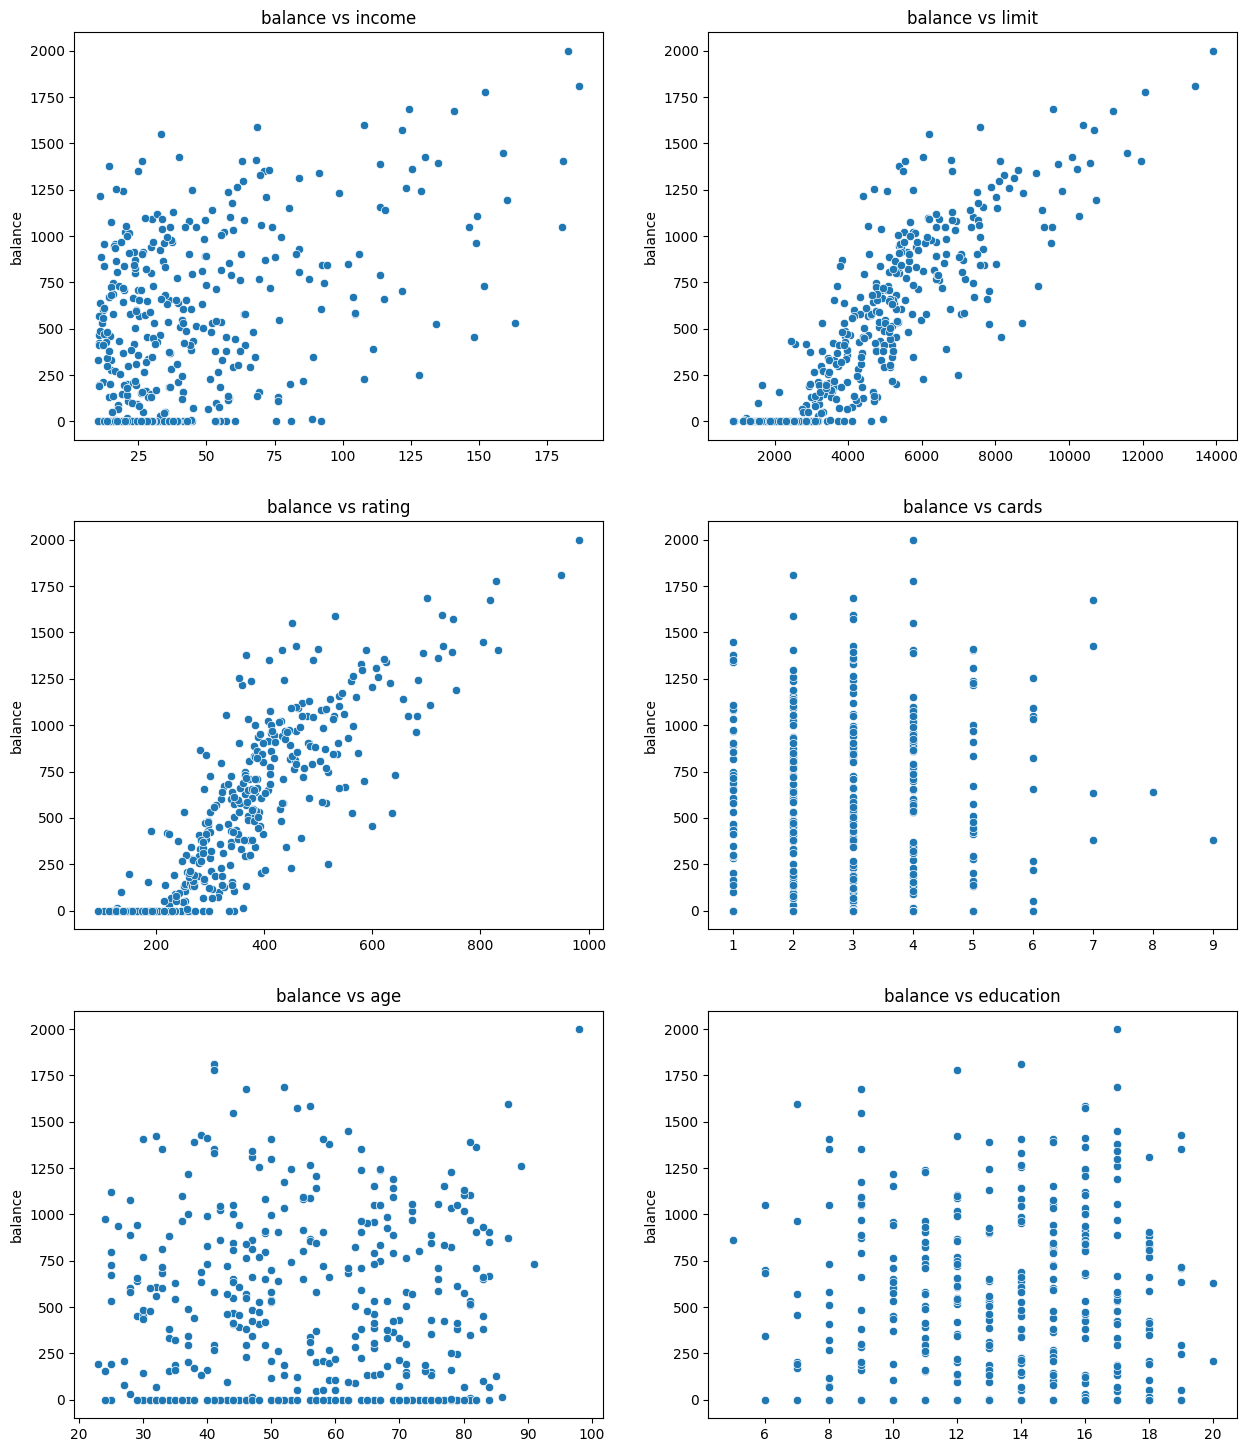

In [77]:
# continuous predictors vs target
numerical_predictors = ["income", "limit", "rating", "cards", "age", "education"]
fig, axs = plt.subplots(3, 2, figsize=(15, 3 * len(numerical_predictors)))
axs = axs.flatten()

for i, predictor in enumerate(numerical_predictors):
    sns.scatterplot(x=predictor, y=target, data=df, ax=axs[i])
    axs[i].set_title(f"{target} vs {predictor}")
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(target)


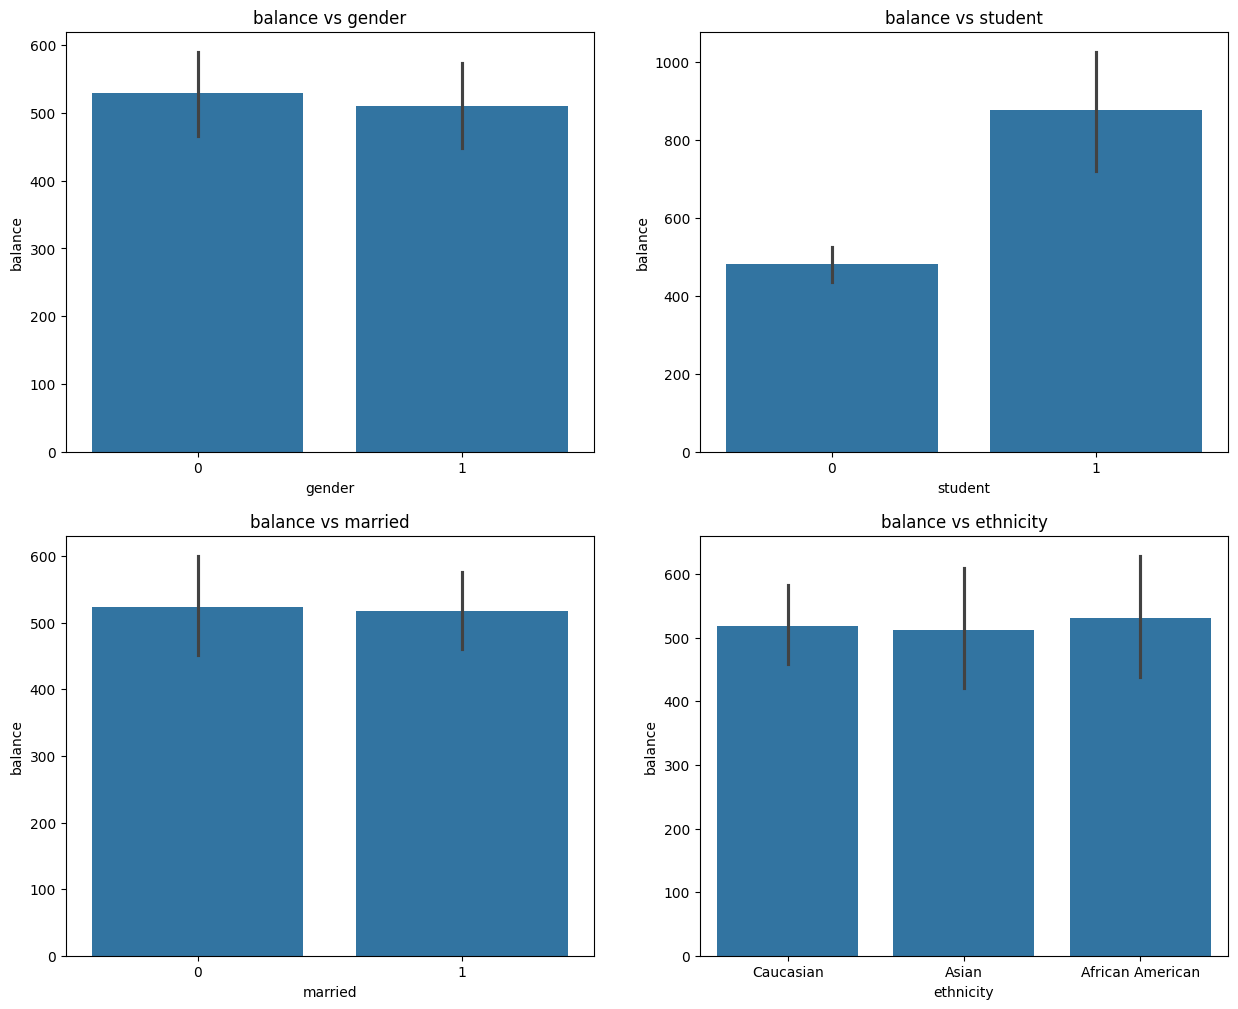

In [78]:
# categorical predictors vs target
categorical_predictors = ["gender", "student", "married", "ethnicity"]
fig, axs = plt.subplots(2, 2, figsize=(15, 3 * len(categorical_predictors)))
axs = axs.flatten()

for i, predictor in enumerate(categorical_predictors):
    sns.barplot(x=predictor, y=target, data=df, ax=axs[i])
    axs[i].set_title(f"{target} vs {predictor}")

## Modelling

### Simple Linear Regression

Let's begin by modelling `balance` as a function of `income`.

But first, we need to split a part of our data off.


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

First, let's separate out a fifth of the dataset. We'll see why we need it later.


In [80]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=10)
df_train.shape

(320, 11)

Let's look at our data again.

<Axes: xlabel='income', ylabel='balance'>

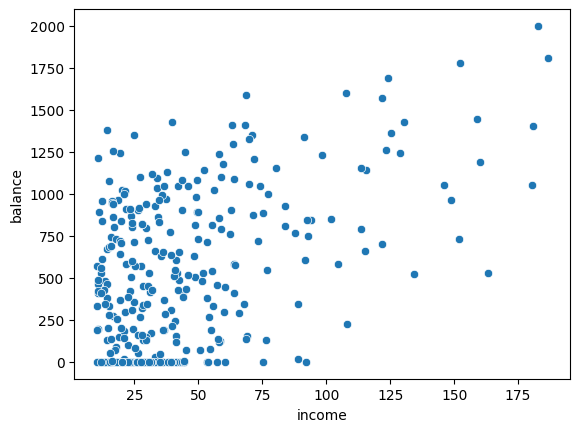

In [81]:
sns.scatterplot(x="income", y=target, data=df_train)

Our task is to predict balance using income as an input. In other word, we need to train a model that is capable of accurately predicting variable `balance` from `income`.

Our first model will be a the simplest possible - a linear model. We'll need to find a linear function (a line) such that when we give a value for `income` it outputs a accurate prediction of `balance`.

Let's write a function called `y`. The function is linear.


In [82]:
def linear_function(x, intercept, slope):
    return slope * x + intercept

Now let's try to come up with a line fits ("explains") our data well. This will be our first model!

In [83]:
# our first model
def model(x):
    # Actual ~ 150, 5
    intercept, slope = 150, 6
    return linear_function(x, intercept, slope)

model(15)


240

So this is our first model! According to the model, a one-unit increase in `income` increases `balance` by 100 (because that's the slope).

But is this a good model? It's probably not, because I just arbitrarily picked the numbers for intercept and slope. Let's plot it.


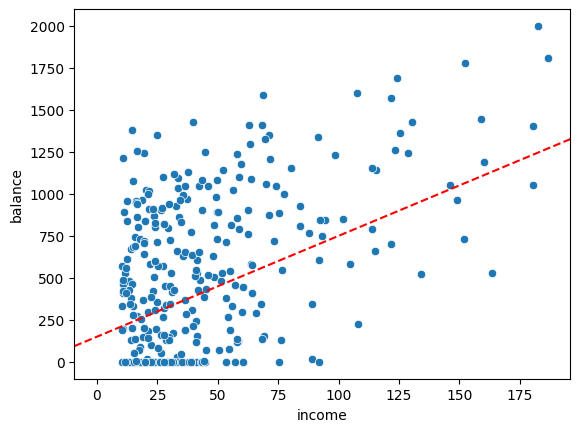

In [84]:
sns.scatterplot(x="income", y=target, data=df_train)

plt.axline(
    xy1=(0, model(0)),
    xy2=(1, model(1)),
    color="red",
    linestyle="--",
)


Trying to fit a line by looking at it on a plot is not a very efficient process. Nonetheless, what we just did would count as training, it's just that our objective function was not clearly specify. How can we measure how good our model is numerically and just minimize that? In other words, what is our loss function?

What we usually do in regression problems is calculate mean squared error to asses how well our model fits the data.


To simplify further steps, let's take out the variables we'll be using. Pro tip - always separate out the predictors (X's) and the target (y) into two separate variables. This is standard practice in modelling and simplifies the rest of the analysis.


In [91]:
X_inc = df_train[["income"]]
y_train = df_train[target]
X_inc

,income
303,44.061
349,48.577
149,13.444
100,21.153
175,30.132
...,...
369,71.682
320,16.279
15,20.089
125,27.578


In [92]:
y_pred = model(X_inc["income"])

In [93]:
# residual sum of squares
np.sum((y_pred - y_train) ** 2)
# or mean squared error
np.mean((y_pred - y_train) ** 2)

np.float64(162529.394030608)

Both MSE and RSS are valid metrics for model fit, and it does not matter which one to minimize. Let's stick with MSE.

Also, both MSE and RSS are examples of *loss functions*. A loss function is a function that the the model training procedure is trying to minimize. We chose MSE for our purposes, but there are many loss functions that we could minimize.


In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
mean_squared_error(y_train, y_pred)

162529.394030608

162529.394030608

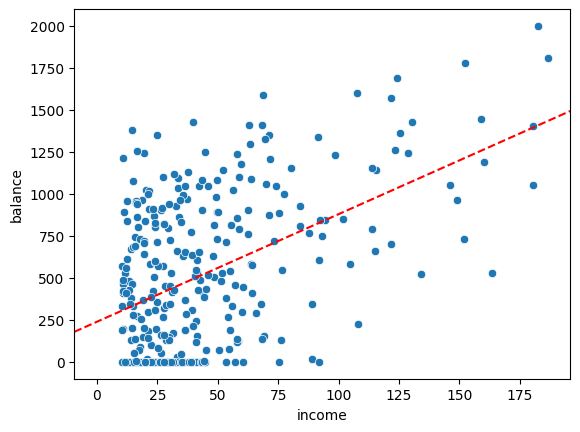

In [96]:
# our first model
def model(x):
    intercept, slope = 239, 6.4
    return linear_function(x, intercept, slope)

sns.scatterplot(x="income", y=target, data=df_train)
plt.axline(
    xy1=(0, model(0)),
    xy2=(1, model(1)),
    color="red",
    linestyle="--",
)

mean_squared_error(y_train, model(X_inc))

Even if we have a way to estimate the accuracy of our line, finding it by trying a bunch of configurations for slope and intercept is very inefficient. It's good that we have algorithms for that.

Ordinary Least Squares (OLS), in the case of simple regression, is a set of formulas for finding the slope and intercept that minimize residual sum of squares (or, equivalently, mean squared error).


In [97]:
model_income = LinearRegression()
model_income.fit(X_inc, y_train)

print("Intercept:", model_income.intercept_, "Slope:", model_income.coef_)

Intercept: 239.55071602197592 Slope: [6.40234967]


And that is our first model fitted via ordinary least squares!

And how good is this model?

In [98]:
y_pred = model_income.predict(X_inc)
mean_squared_error(y_train, y_pred)

162528.95799641774

 By the way, "model fitting" and "model training" are synonyms - they both refer to the process of finding the parameters that minimize the loss function. That loss function, in our case, was residual sum of squares.

The model we created so far is not very good - it tries to predict balance from just one variable.


Text(0, 0.5, 'Predictions')

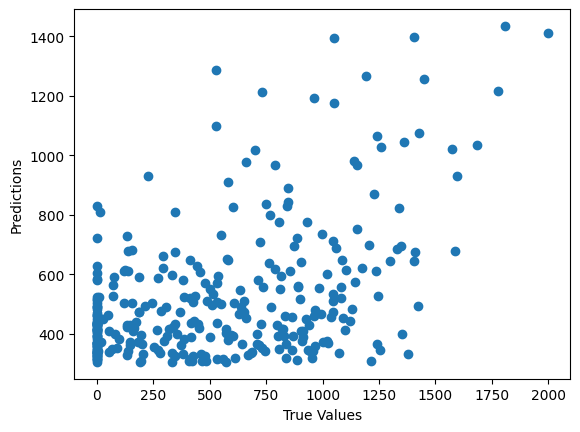

In [99]:
plt.scatter(x=y_train, y=y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Multiple predictors

Our previous model is very simple. In it, we're trying to predict the target variable `balance` only from `income`. We have many variables in our dataset, let's use them.


In [100]:
X_inc_rtg = df_train[["income", "rating"]]

model_inc_rtg = LinearRegression()
model_inc_rtg.fit(X_inc_rtg, y_train)
y_pred = model_inc_rtg.predict(X_inc_rtg)

mse_inc_rtg = mean_squared_error(y_train, y_pred)
mse_inc_rtg

25106.817564785484

In [101]:
import plotly.graph_objects as go
import numpy as np

x = np.linspace(X_inc_rtg["income"].min(), X_inc_rtg["income"].max(), 50)
y = np.linspace(X_inc_rtg["rating"].min(), X_inc_rtg["rating"].max(), 50)
x, y = np.meshgrid(x, y)
z = (
    model_inc_rtg.intercept_
    + model_inc_rtg.coef_[0] * x
    + model_inc_rtg.coef_[1] * y
)

fig = go.Figure(
    [
        go.Scatter3d(
            x=X_inc_rtg["income"],
            y=X_inc_rtg["rating"],
            z=y_train,
            mode="markers",
            marker=dict(size=4),
        ),
        go.Surface(x=x, y=y, z=z, opacity=0.3, showscale=False),
    ]
)

fig.update_layout(
    scene=dict(xaxis_title="Income", yaxis_title="Rating", zaxis_title="Balance"),
    width=800,
    height=600,
    title="Multiple Linear Regression",
)

fig.show()

### Categorical predictors

So far we've been using numerical predictors, such as `income` and `rating`. But how do we use categorical predictors, such as `ethnicity`? After all, what we have in that column is not a number that we can plug into an equation, but a string.


In [102]:
df["ethnicity"].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [103]:
X_train_eth = df_train[["ethnicity"]]

We have to transform the `ethnicity` variable into some sort of numerical representation. The most popular way to do that is called one-hot encoding.

In [104]:
X_train_eth["ethnicity_caucasian"] = X_train_eth["ethnicity"] == "Caucasian"
X_train_eth["ethnicity_asian"] = X_train_eth["ethnicity"] == "Asian"
X_train_eth["ethnicity_african_american"] = (
    X_train_eth["ethnicity"] == "African American"
)
X_train_eth

,ethnicity,ethnicity_caucasian,ethnicity_asian,ethnicity_african_american
303,African American,False,False,True
349,Asian,False,True,False
149,Asian,False,True,False
100,Caucasian,True,False,False
175,Caucasian,True,False,False
...,...,...,...,...
369,Caucasian,True,False,False
320,African American,False,False,True
15,African American,False,False,True
125,Caucasian,True,False,False


Two things to note here:
1. One of the columns is redundant. The ethnicities in the dataset are collectively exhaustive, therefore if both `ethnicity_caucasian` and `ethnicity_asian` are False, then ethnicity has to be African American. Having two of the columns is enough, since the third column adds no information.
2. Scikit-learn can again simplify things for us (imagine how annoying it would be if the categorical column had 10s of possible values)



In [105]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
X_train_eth = df_train[["ethnicity"]]

encoder = OneHotEncoder(drop="first")

# Transform to array and convert to dataframe with column names
ethnicity_onehot = encoder.fit_transform(X_train_eth).toarray()
ethnicity_onehot = pd.DataFrame(
    ethnicity_onehot,
    columns=encoder.get_feature_names_out(["ethnicity"]),
    index=df_train.index,
)
ethnicity_onehot

,ethnicity_Asian,ethnicity_Caucasian
303,0.0,0.0
349,1.0,0.0
149,1.0,0.0
100,0.0,1.0
175,0.0,1.0
...,...,...
369,0.0,1.0
320,0.0,0.0
15,0.0,0.0
125,0.0,1.0


In [107]:
X_train_eth_inc_rtg = pd.concat(
    [ethnicity_onehot, df_train[["income", "rating"]]], axis=1
)

X_train_eth_inc_rtg.sample(5)

,ethnicity_Asian,ethnicity_Caucasian,income,rating
16,0.0,0.0,53.598,286
189,0.0,1.0,58.351,326
269,0.0,1.0,39.055,410
58,0.0,1.0,10.354,281
200,0.0,0.0,23.949,383


In [108]:
model_eth_inc_rtg = LinearRegression()
model_eth_inc_rtg.fit(X_train_eth_inc_rtg, y_train)

y_pred = model_eth_inc_rtg.predict(X_train_eth_inc_rtg)

mse_eth_inc_rtg = mean_squared_error(y_train, y_pred)
mse_eth_inc_rtg

24870.689950845746

In [109]:
mse_inc_rtg

25106.817564785484

Our MSE improved, although by very little.


### Polynomial predictors

What if I want to go beyond linear? Maybe the relationship between `balance` and `income` is quadratic, and I can improve my model by adding quadratic features?


In [110]:
X_train_inc_poly = df_train[["income"]]
X_train_inc_poly["income_squared"] = X_train_inc_poly["income"] ** 2
X_train_inc_poly

,income,income_squared
303,44.061,1941.371721
349,48.577,2359.724929
149,13.444,180.741136
100,21.153,447.449409
175,30.132,907.937424
...,...,...
369,71.682,5138.309124
320,16.279,265.005841
15,20.089,403.567921
125,27.578,760.546084


In [111]:
model_inc_poly = LinearRegression()
model_inc_poly.fit(X_train_inc_poly, y_train)
y_pred = model_inc_poly.predict(X_train_inc_poly)


<Axes: xlabel='income', ylabel='balance'>

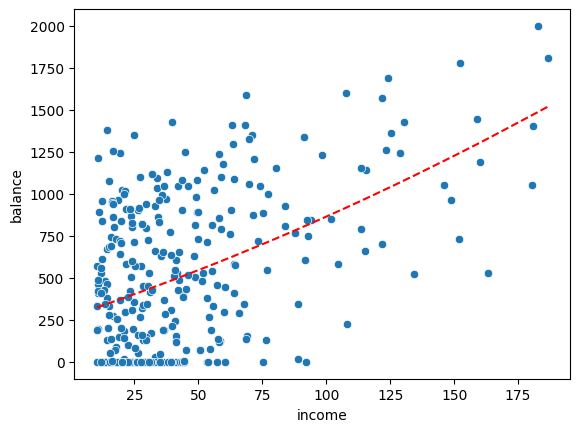

In [112]:
sns.scatterplot(x="income", y="balance", data=df_train)
sns.lineplot(x=df_train["income"], y=y_pred, color="red", linestyle="--")


In [113]:
X_train_inc_poly["income_cubed"] = X_train_inc_poly["income"] ** 3
X_train_inc_poly

model_inc_poly.fit(X_train_inc_poly, y_train)
y_pred = model_inc_poly.predict(X_train_inc_poly)

mse_inc_poly = mean_squared_error(y_train, y_pred)
mse_inc_poly

162146.0348492539

<Axes: xlabel='income', ylabel='balance'>

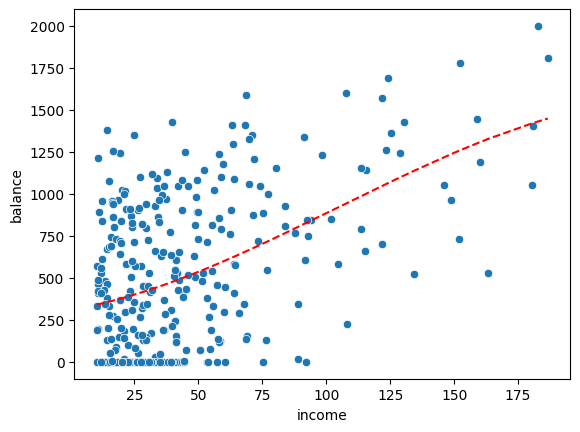

In [114]:
sns.scatterplot(x="income", y="balance", data=df_train)
sns.lineplot(x=df_train["income"], y=y_pred, color="red", linestyle="--")


### Interaction terms

What if the target is predicted by two variables *jointly*? That is, a multiplication of two variables predicts some target variable?



In [115]:
df_train.columns

Index(['income', 'limit', 'rating', 'cards', 'age', 'education', 'gender',
       'student', 'married', 'ethnicity', 'balance'],
      dtype='object')

<Axes: xlabel='rating', ylabel='balance'>

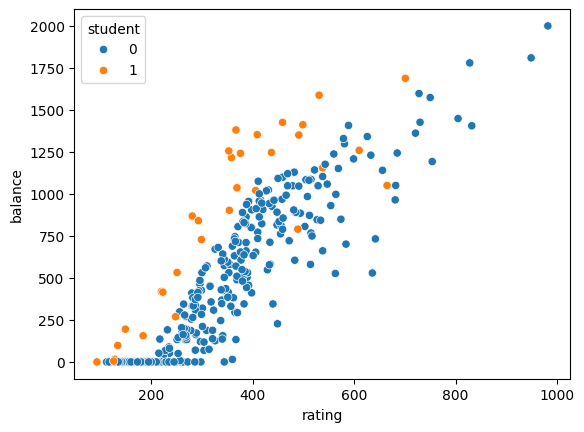

In [116]:
sns.scatterplot(x="rating", y="balance", data=df_train, hue="student")

In the plot above, we can see that the relationship between `balance` and `limit` is different for students and for non-students. The best-fitting line for students would sit slightly above that of non-students, and maybe have a different slope too.

In [117]:
X_rtg_stud_int = df_train[["rating", "student"]]
X_rtg_stud_int["rating_x_student"] = (
    X_rtg_stud_int["rating"] * X_rtg_stud_int["student"]
)
X_rtg_stud_int

,rating,student,rating_x_student
303,352,0,0
349,389,0,0
149,121,0,0
100,256,0,0
175,206,0,0
...,...,...,...
369,599,0,0
320,126,1,126
15,200,0,0
125,195,0,0


In [118]:
model_rtg_stud_int = LinearRegression()
model_rtg_stud_int.fit(X_rtg_stud_int, y_train)
y_pred = model_rtg_stud_int.predict(X_rtg_stud_int)

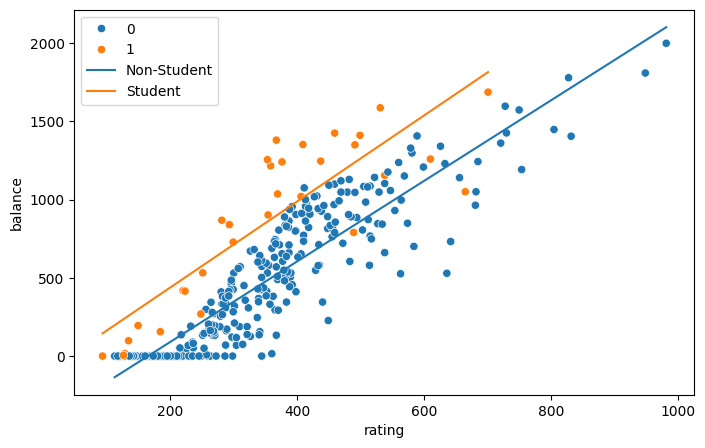

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.scatterplot(x="rating", y="balance", data=df_train, ax=ax, hue="student")

sns.lineplot(
    x=df_train.loc[df_train["student"] == 0, "rating"],
    y=y_pred[df_train["student"] == 0],
    label="Non-Student",
)

sns.lineplot(
    x=df_train.loc[df_train["student"] == 1, "rating"],
    y=y_pred[df_train["student"] == 1],
    label="Student",
)

ax.legend()

### Polynomial terms and interactions

Adding all of these new terms is a bit tedious, but scikit-learn simplifies it for us here as well.


In [120]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
features = poly.fit_transform(X_inc)
pd.DataFrame(features, columns=poly.get_feature_names_out())

,income,income^2
0,44.061,1941.371721
1,48.577,2359.724929
2,13.444,180.741136
3,21.153,447.449409
4,30.132,907.937424
...,...,...
315,71.682,5138.309124
316,16.279,265.005841
317,20.089,403.567921
318,27.578,760.546084


In [121]:
features = poly.fit_transform(X_inc_rtg)
pd.DataFrame(features, columns=poly.get_feature_names_out())


,income,rating,income^2,income rating,rating^2
0,44.061,352.0,1941.371721,15509.472,123904.0
1,48.577,389.0,2359.724929,18896.453,151321.0
2,13.444,121.0,180.741136,1626.724,14641.0
3,21.153,256.0,447.449409,5415.168,65536.0
4,30.132,206.0,907.937424,6207.192,42436.0
...,...,...,...,...,...
315,71.682,599.0,5138.309124,42937.518,358801.0
316,16.279,126.0,265.005841,2051.154,15876.0
317,20.089,200.0,403.567921,4017.800,40000.0
318,27.578,195.0,760.546084,5377.710,38025.0


In [122]:
model_inc_rtg_poly = LinearRegression()
model_inc_rtg_poly.fit(features, y_train)
y_pred = model_inc_rtg_poly.predict(features)
mse_inc_rtg_poly = mean_squared_error(y_train, y_pred)
mse_inc_rtg_poly


21231.942233217895

### Putting it all together

Let's now use all features available.

In [123]:
y = df_train["balance"]
X = df_train.drop(columns=["balance"])


#### Encode categorical variables

In [124]:
encoder = OneHotEncoder(drop="first")
encoder.fit(X[["ethnicity"]])
X_cat = encoder.transform(X[["ethnicity"]]).toarray()
X_cat = pd.DataFrame(
    X_cat, columns=encoder.get_feature_names_out(["ethnicity"]), index=X.index
)
X = pd.concat([X.drop(columns=["ethnicity"]), X_cat], axis=1)


#### Add features

In [125]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
X = pd.DataFrame(X, columns=poly.get_feature_names_out())


In [126]:
X

,income,limit,rating,cards,age,education,gender,student,married,ethnicity_Asian,...,student^2,student married,student ethnicity_Asian,student ethnicity_Caucasian,married^2,married ethnicity_Asian,married ethnicity_Caucasian,ethnicity_Asian^2,ethnicity_Asian ethnicity_Caucasian,ethnicity_Caucasian^2
0,44.061,4970.0,352.0,1.0,79.0,11.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,48.577,5145.0,389.0,3.0,71.0,13.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,13.444,886.0,121.0,5.0,44.0,10.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,21.153,3736.0,256.0,1.0,41.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.132,2168.0,206.0,3.0,52.0,17.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,71.682,8028.0,599.0,3.0,57.0,16.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
316,16.279,1160.0,126.0,3.0,78.0,13.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
317,20.089,2525.0,200.0,3.0,57.0,15.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
318,27.578,2531.0,195.0,1.0,34.0,15.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [127]:
model_final = LinearRegression()
model_final.fit(X, y)
y_pred = model_final.predict(X)
mse_final = mean_squared_error(y, y_pred)
mse_final


2388.2904488181007

## Recap

- Non-numerical features have to be transformed into a numerical representation before we feed them into a model.
- There are many transformations we can apply to our features before we feed them into our model, today we learned about polynomial and interaction terms.
- MSE is one way to evaluate a model, though quite tough to interpret. On week 5 we will look into more ways to evaluate how good our model is.
- In fact, the number of possible transformations we can apply results in a combinatorial explosion - there's no way we can try all transformations and see how they affect the performance on the model. That's why we have to narrow down the search space to only things that make sense, and that's why expertise and context matter.
- None of the models that we made can be interpreted causally. However, they are still useful for solving real-world problems that involve prediction.
- Go through this notebook again before the seminar, making sure you understand everything that's going on.

